<a href="https://colab.research.google.com/github/khan-habibullah/ml1/blob/master/LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [64]:
Data = [[(i+j)/100 for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [65]:
Data

[[0.0, 0.01, 0.02, 0.03, 0.04],
 [0.01, 0.02, 0.03, 0.04, 0.05],
 [0.02, 0.03, 0.04, 0.05, 0.06],
 [0.03, 0.04, 0.05, 0.06, 0.07],
 [0.04, 0.05, 0.06, 0.07, 0.08],
 [0.05, 0.06, 0.07, 0.08, 0.09],
 [0.06, 0.07, 0.08, 0.09, 0.1],
 [0.07, 0.08, 0.09, 0.1, 0.11],
 [0.08, 0.09, 0.1, 0.11, 0.12],
 [0.09, 0.1, 0.11, 0.12, 0.13],
 [0.1, 0.11, 0.12, 0.13, 0.14],
 [0.11, 0.12, 0.13, 0.14, 0.15],
 [0.12, 0.13, 0.14, 0.15, 0.16],
 [0.13, 0.14, 0.15, 0.16, 0.17],
 [0.14, 0.15, 0.16, 0.17, 0.18],
 [0.15, 0.16, 0.17, 0.18, 0.19],
 [0.16, 0.17, 0.18, 0.19, 0.2],
 [0.17, 0.18, 0.19, 0.2, 0.21],
 [0.18, 0.19, 0.2, 0.21, 0.22],
 [0.19, 0.2, 0.21, 0.22, 0.23],
 [0.2, 0.21, 0.22, 0.23, 0.24],
 [0.21, 0.22, 0.23, 0.24, 0.25],
 [0.22, 0.23, 0.24, 0.25, 0.26],
 [0.23, 0.24, 0.25, 0.26, 0.27],
 [0.24, 0.25, 0.26, 0.27, 0.28],
 [0.25, 0.26, 0.27, 0.28, 0.29],
 [0.26, 0.27, 0.28, 0.29, 0.3],
 [0.27, 0.28, 0.29, 0.3, 0.31],
 [0.28, 0.29, 0.3, 0.31, 0.32],
 [0.29, 0.3, 0.31, 0.32, 0.33],
 [0.3, 0.31, 0.32, 0.33, 

In [90]:
data=np.array(Data,dtype=float)
target = np.array(target,dtype=float)

In [91]:
data.shape

(100, 5)

In [92]:
target.shape

(100,)

In [93]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=4)

In [94]:
model=Sequential()

In [95]:
model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=True))
model.add(LSTM((1), return_sequences=False))

In [96]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 5, 1)              12        
                                                                 
 lstm_14 (LSTM)              (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [98]:
history=model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
3/3 [==============================] - 6s 697ms/step - loss: 0.5006 - accuracy: 0.0000e+00 - val_loss: 0.4010 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 26ms/step - loss: 0.4966 - accuracy: 0.0000e+00 - val_loss: 0.3973 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 26ms/step - loss: 0.4927 - accuracy: 0.0000e+00 - val_loss: 0.3935 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 26ms/step - loss: 0.4887 - accuracy: 0.0000e+00 - val_loss: 0.3897 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 27ms/step - loss: 0.4846 - accuracy: 0.0000e+00 - val_loss: 0.3858 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 24ms/step - loss: 0.4804 - accuracy: 0.0000e+00 - val_loss: 0.3818 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 25ms/step - loss: 0.4761 - accuracy: 0.0000e+00 - val_los

In [99]:
results=model.predict(x_test)

1/1 [==============================] - 1s 821ms/step


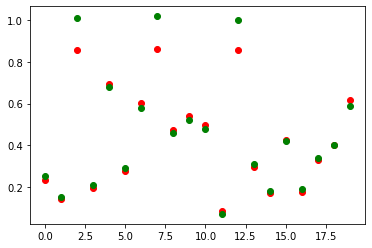

In [100]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()